### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
zoo=pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


### Data Understanding

In [3]:
zoo.shape

(101, 18)

In [4]:
zoo.isna().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [7]:
zoo['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [8]:
zoo['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

### Data Visualization

#### Hist and Pie Plots for Label

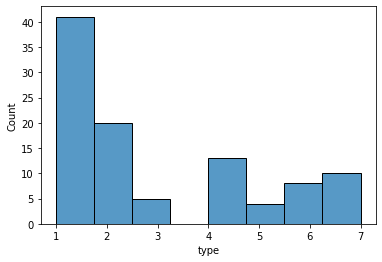

In [9]:
sns.histplot(zoo.type)
plt.show()

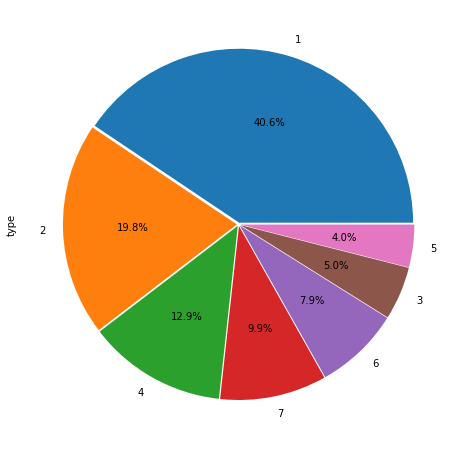

In [10]:
plt.figure(figsize=(8,8))
zoo.type.value_counts().plot(kind='pie',explode=[0.01,0.01,0.01,0.01,0.01,0.01,0.01],autopct='%.1f%%')
plt.show()

#### Hist Plots for Features

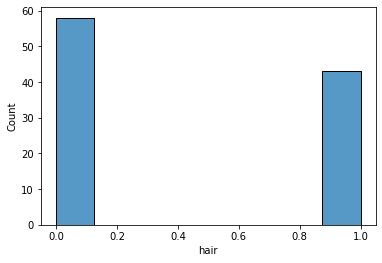

In [11]:
sns.histplot(zoo.hair)
plt.show()

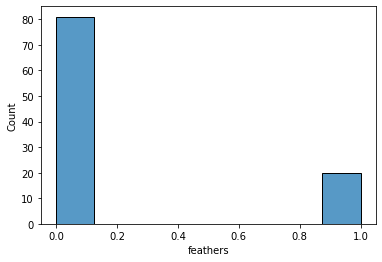

In [12]:
sns.histplot(zoo.feathers)
plt.show()

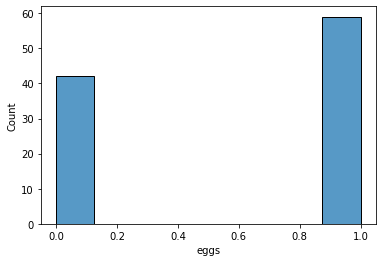

In [13]:
sns.histplot(zoo.eggs)
plt.show()

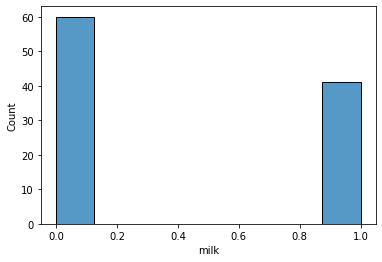

In [14]:
sns.histplot(zoo.milk)
plt.show()

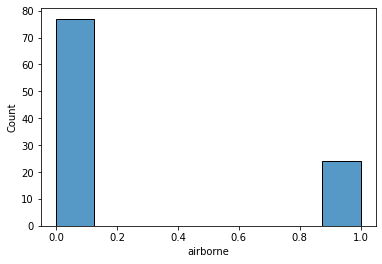

In [15]:
sns.histplot(zoo.airborne)
plt.show()

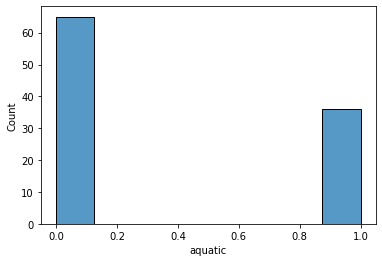

In [16]:
sns.histplot(zoo.aquatic)
plt.show()

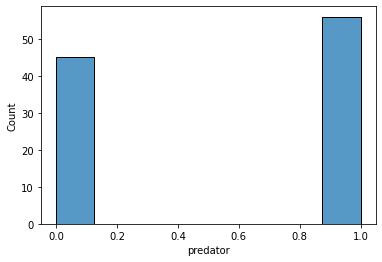

In [17]:
sns.histplot(zoo.predator)
plt.show()

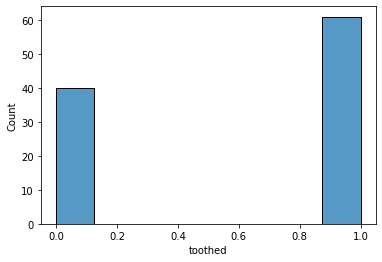

In [18]:
sns.histplot(zoo.toothed)
plt.show()

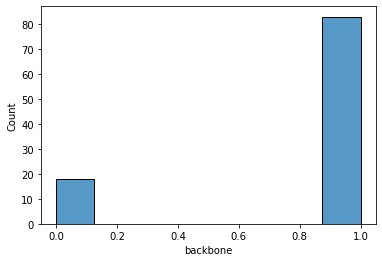

In [19]:
sns.histplot(zoo.backbone)
plt.show()

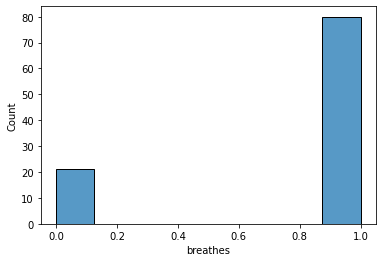

In [20]:
sns.histplot(zoo.breathes)
plt.show()

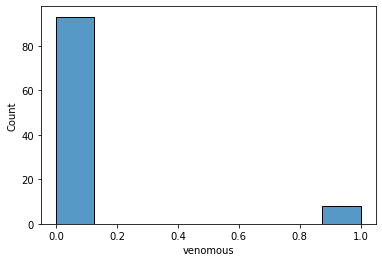

In [21]:
sns.histplot(zoo.venomous)
plt.show()

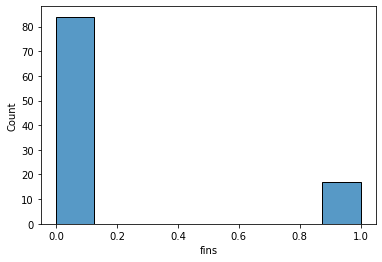

In [22]:
sns.histplot(zoo.fins)
plt.show()

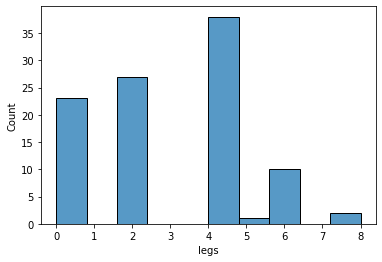

In [23]:
sns.histplot(zoo.legs)
plt.show()

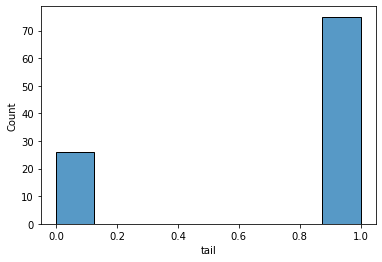

In [24]:
sns.histplot(zoo['tail'])
plt.show()

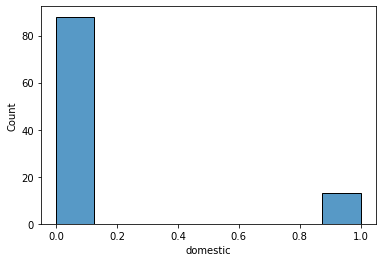

In [25]:
sns.histplot(zoo.domestic)
plt.show()

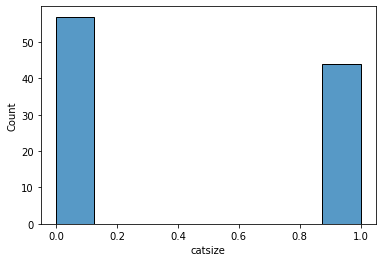

In [26]:
sns.histplot(zoo.catsize)
plt.show()

In [27]:
#Finding Correlation Matrics to check Multicollinearity
corr=zoo.corr().round(2)
corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.00,-0.43,-0.82,0.88,-0.20,-0.47,-0.15,0.49,0.19,0.44,-0.10,-0.28,0.39,0.05,0.21,0.46,-0.56
feathers,-0.43,1.00,0.42,-0.41,0.66,-0.06,-0.10,-0.61,0.23,0.25,-0.15,-0.22,-0.21,0.29,0.03,-0.14,-0.20
eggs,-0.82,0.42,1.00,-0.94,0.38,0.38,0.01,-0.64,-0.34,-0.38,0.10,0.16,-0.22,-0.22,-0.16,-0.51,0.66
milk,0.88,-0.41,-0.94,1.00,-0.37,-0.36,-0.03,0.63,0.38,0.42,-0.24,-0.16,0.21,0.21,0.16,0.57,-0.72
airborne,-0.20,0.66,0.38,-0.37,1.00,-0.17,-0.30,-0.59,-0.10,0.29,0.01,-0.25,0.04,0.01,0.06,-0.35,0.02
aquatic,-0.47,-0.06,0.38,-0.36,-0.17,1.00,0.38,0.05,0.02,-0.64,0.09,0.60,-0.36,-0.03,-0.22,-0.11,0.33
predator,-0.15,-0.10,0.01,-0.03,-0.30,0.38,1.00,0.13,0.05,-0.26,0.12,0.19,-0.10,0.02,-0.31,0.14,0.06
toothed,0.49,-0.61,-0.64,0.63,-0.59,0.05,0.13,1.00,0.58,-0.07,-0.06,0.36,-0.19,0.31,0.07,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-0.10,0.02,0.05,0.58,1.00,0.21,-0.25,0.21,-0.43,0.73,0.10,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,0.29,-0.64,-0.26,-0.07,0.21,1.00,-0.12,-0.62,0.37,0.09,0.12,0.20,-0.52


In [28]:
#Replace diagonal values as 0 from 1
np.fill_diagonal(a=corr.values,val=0)
corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,0.00,-0.43,-0.82,0.88,-0.20,-0.47,-0.15,0.49,0.19,0.44,-0.10,-0.28,0.39,0.05,0.21,0.46,-0.56
feathers,-0.43,0.00,0.42,-0.41,0.66,-0.06,-0.10,-0.61,0.23,0.25,-0.15,-0.22,-0.21,0.29,0.03,-0.14,-0.20
eggs,-0.82,0.42,0.00,-0.94,0.38,0.38,0.01,-0.64,-0.34,-0.38,0.10,0.16,-0.22,-0.22,-0.16,-0.51,0.66
milk,0.88,-0.41,-0.94,0.00,-0.37,-0.36,-0.03,0.63,0.38,0.42,-0.24,-0.16,0.21,0.21,0.16,0.57,-0.72
airborne,-0.20,0.66,0.38,-0.37,0.00,-0.17,-0.30,-0.59,-0.10,0.29,0.01,-0.25,0.04,0.01,0.06,-0.35,0.02
aquatic,-0.47,-0.06,0.38,-0.36,-0.17,0.00,0.38,0.05,0.02,-0.64,0.09,0.60,-0.36,-0.03,-0.22,-0.11,0.33
predator,-0.15,-0.10,0.01,-0.03,-0.30,0.38,0.00,0.13,0.05,-0.26,0.12,0.19,-0.10,0.02,-0.31,0.14,0.06
toothed,0.49,-0.61,-0.64,0.63,-0.59,0.05,0.13,0.00,0.58,-0.07,-0.06,0.36,-0.19,0.31,0.07,0.34,-0.47
backbone,0.19,0.23,-0.34,0.38,-0.10,0.02,0.05,0.58,0.00,0.21,-0.25,0.21,-0.43,0.73,0.10,0.36,-0.83
breathes,0.44,0.25,-0.38,0.42,0.29,-0.64,-0.26,-0.07,0.21,0.00,-0.12,-0.62,0.37,0.09,0.12,0.20,-0.52


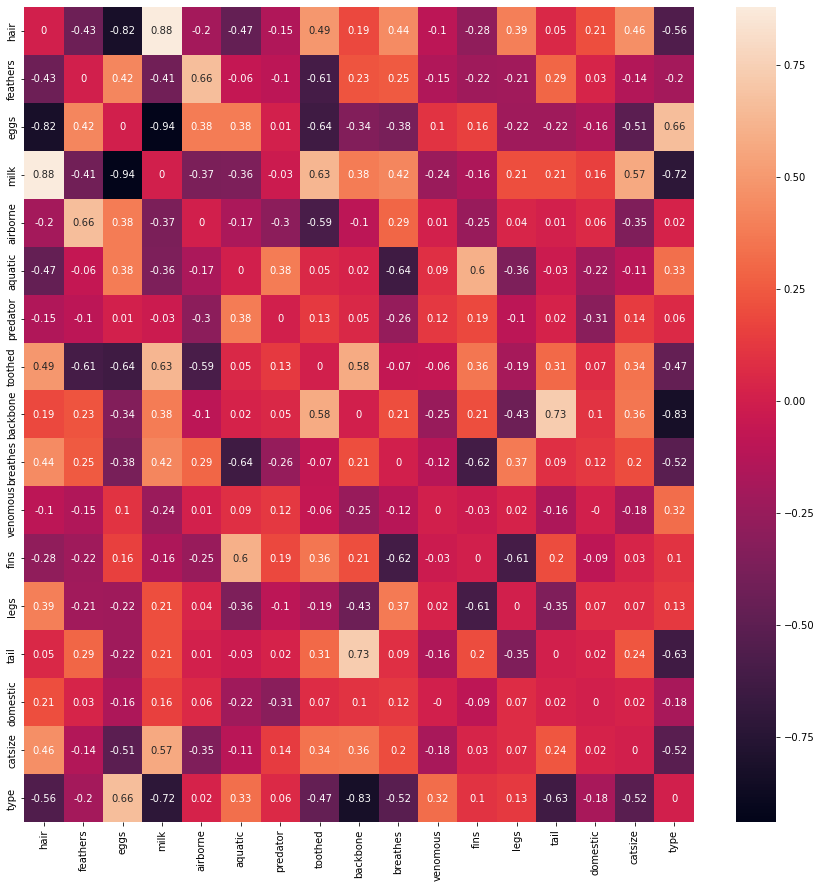

In [29]:
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True)
plt.show()

#### From Heatmap, we can observe that there is multi collinearity

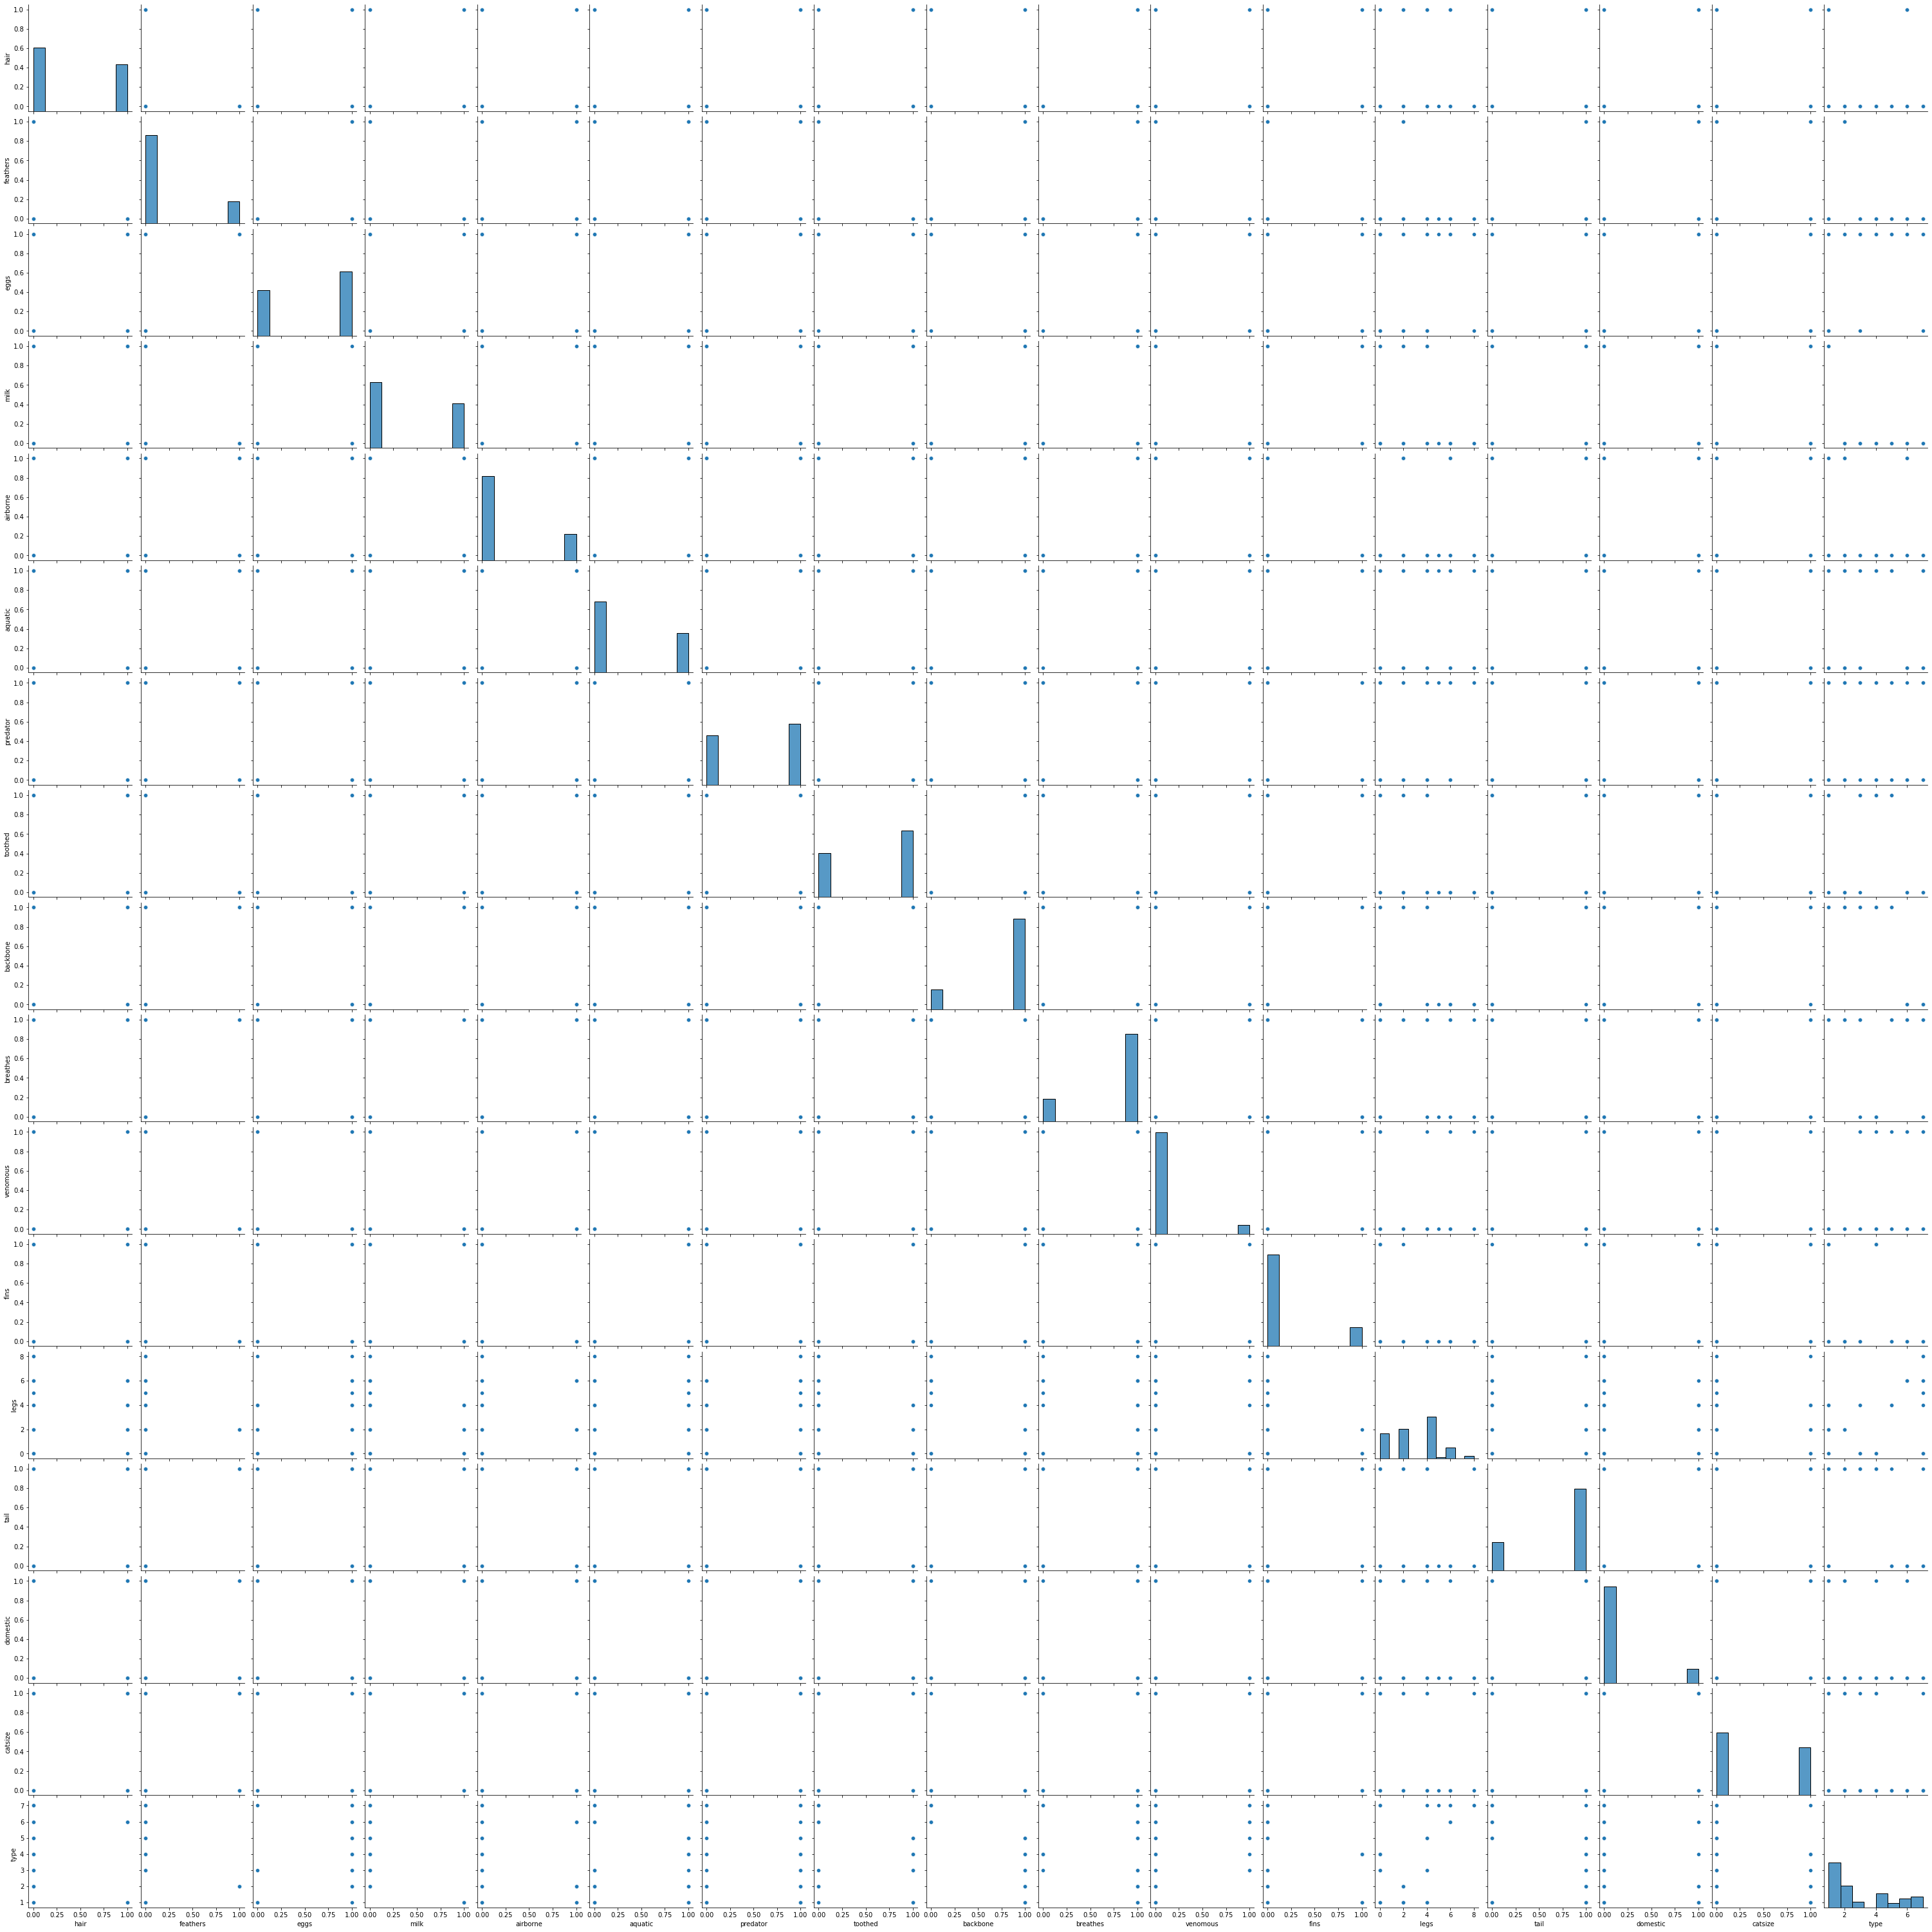

In [30]:
sns.pairplot(zoo)
plt.show()

### Data Preparation

In [31]:
zoo.shape

(101, 18)

In [32]:
zoo['animal name']

0      aardvark
1      antelope
2          bass
3          bear
4          boar
         ...   
96      wallaby
97         wasp
98         wolf
99         worm
100        wren
Name: animal name, Length: 101, dtype: object

In [33]:
le=LabelEncoder()
zoo['animal name']=le.fit_transform(zoo['animal name'])

In [34]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [35]:
#Splitting data set into Features and Label
X=zoo.drop('type',axis=1)
y=zoo['type']

### Model Building || Training || Prediction || Evaluation

In [36]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25,shuffle=True,stratify=y)

In [37]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 17), (21, 17), (80,), (21,))

In [38]:
#Considering 3 Neighbours
knn_3=KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train,y_train)
y_pred_knn_3=knn_3.predict(X_test)
acc_3=np.round(accuracy_score(y_test,y_pred_knn_3),4)
acc_3

0.381

In [39]:
#Considering 5 Neighbours
knn_5=KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)
y_pred_knn_5=knn_5.predict(X_test)
acc_5=np.round(accuracy_score(y_test,y_pred_knn_5),4)
acc_5

0.381

In [40]:
#Considering 7 Neighbours
knn_7=KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)
y_pred_knn_7=knn_7.predict(X_test)
acc_7=np.round(accuracy_score(y_test,y_pred_knn_7),4)
acc_7

0.4286

### Grid Search to find optimum number of K-Neighbours

In [41]:
test=[]
neighbours = list(range(1,50,2))
for i in neighbours:
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(estimator=knn,X=X,y=y,cv=10)
    mean_score=np.round(np.mean(score),4)
    test.append(mean_score)
    print(mean_score)

0.4845
0.4445
0.4155
0.3855
0.3355
0.3555
0.3655
0.3855
0.3755
0.3855
0.3955
0.3955
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055
0.4055


In [42]:
#Optmum Number of Neighbours
neighbours[test.index(np.max(test))]

1

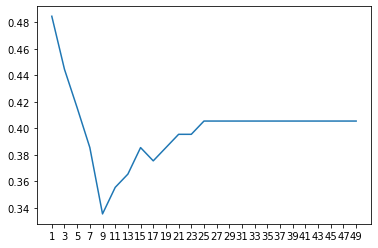

In [43]:
plt.plot(neighbours,test)
plt.xticks(np.arange(1, 50, step=2))
plt.show()

#### By Grid search and plot, we can observe that Optimum number of neighbours = 3

### Final Model with Neighbours = 1

In [44]:
#Considering 1 Neighbours
knn_1=KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train,y_train)
y_pred_knn_1=knn_1.predict(X_test)
acc_1=np.round(accuracy_score(y_test,y_pred_knn_1),4)
print(f'Accuracy score is {acc_1}')

Accuracy score is 0.5238


### End !!!